In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "crypto-coin-infos"

In [3]:
library(readxl)

In [4]:
cmd <- read_excel("../input/crypto-coin-infos/cmd_final.xlsx")
pod <- read_excel("../input/crypto-coin-infos/pod_final.xlsx")

In [5]:
str(cmd)

tibble [7,459 × 59] (S3: tbl_df/tbl/data.frame)
 $ id                                             : chr [1:7459] "bitcoin" "01coin" "0-5x-long-algorand-token" "0-5x-long-altcoin-index-token" ...
 $ symbol                                         : chr [1:7459] "btc" "zoc" "algohalf" "althalf" ...
 $ name                                           : chr [1:7459] "Bitcoin" "01coin" "0.5X Long Algorand Token" "0.5X Long Altcoin Index Token" ...
 $ asset_platform_id                              : chr [1:7459] NA NA "ethereum" "ethereum" ...
 $ block_time_in_minutes                          : num [1:7459] 10 0 0 0 0 0 0 0 0 0 ...
 $ hashing_algorithm                              : chr [1:7459] "SHA-256" "NeoScrypt" NA NA ...
 $ categories                                     : chr [1:7459] "['Cryptocurrency']" "['Masternodes']" "[]" "[]" ...
 $ country_origin                                 : chr [1:7459] NA NA NA NA ...
 $ genesis_date                                   : chr [1:7459] "2009-01

In [6]:
cmd[cmd == "{}"] <- NA
chr_cols <- c('md_current_price', 'md_fdv_to_tvl_ratio', 'md_roi', 'md_ath', 'md_atl', 'md_market_cap',
          'md_fully_diluted_valuation', 'md_total_volume', 'md_total_volume', 'md_high_24h', 'md_low_24h',
          'md_price_change_24h_in_currency', 'md_price_change_percentage_1h_in_currency',
          'md_price_change_percentage_24h_in_currency', 'md_price_change_percentage_7d_in_currency',
          'md_price_change_percentage_14d_in_currency', 'md_price_change_percentage_30d_in_currency',
          'md_price_change_percentage_60d_in_currency', 'md_price_change_percentage_200d_in_currency',
          'md_price_change_percentage_1y_in_currency', 'md_market_cap_change_24h_in_currency',
          'md_market_cap_change_percentage_24h_in_currency')
for(i in chr_cols){
  cmd[i] <- as.numeric(cmd[[i]])
}

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [7]:
str(cmd)

tibble [7,459 × 59] (S3: tbl_df/tbl/data.frame)
 $ id                                             : chr [1:7459] "bitcoin" "01coin" "0-5x-long-algorand-token" "0-5x-long-altcoin-index-token" ...
 $ symbol                                         : chr [1:7459] "btc" "zoc" "algohalf" "althalf" ...
 $ name                                           : chr [1:7459] "Bitcoin" "01coin" "0.5X Long Algorand Token" "0.5X Long Altcoin Index Token" ...
 $ asset_platform_id                              : chr [1:7459] NA NA "ethereum" "ethereum" ...
 $ block_time_in_minutes                          : num [1:7459] 10 0 0 0 0 0 0 0 0 0 ...
 $ hashing_algorithm                              : chr [1:7459] "SHA-256" "NeoScrypt" NA NA ...
 $ categories                                     : chr [1:7459] "['Cryptocurrency']" "['Masternodes']" "[]" "[]" ...
 $ country_origin                                 : chr [1:7459] NA NA NA NA ...
 $ genesis_date                                   : chr [1:7459] "2009-01

In [8]:
for(i in 1:dim(cmd)[2]){
  if(sum(is.na(cmd[i])) == dim(cmd)[1]){
    print(colnames(cmd)[i])
  }
}

[1] "md_roi"


In [9]:
drop <- c("md_roi")
cmd <- cmd[, !(names(cmd) %in% drop)]

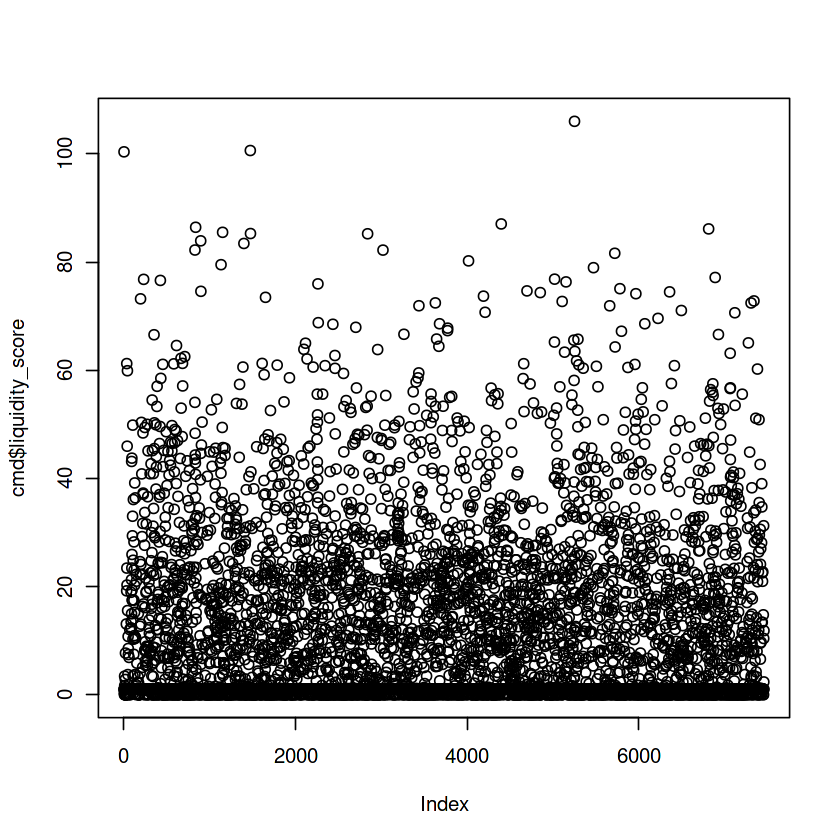

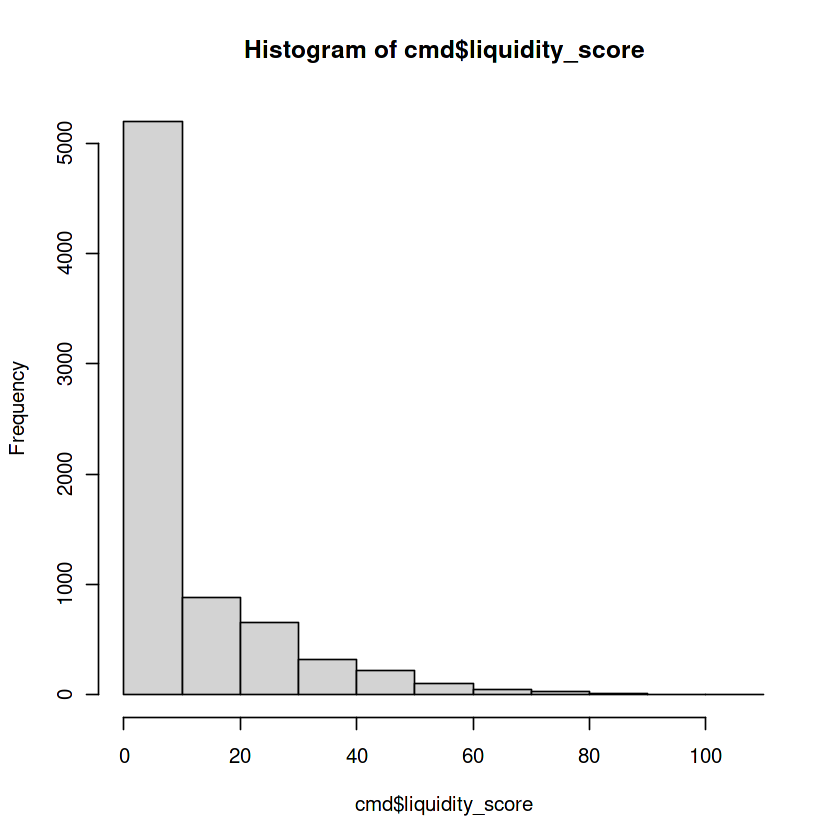

In [10]:
plot(cmd$liquidity_score)
hist(cmd$liquidity_score)

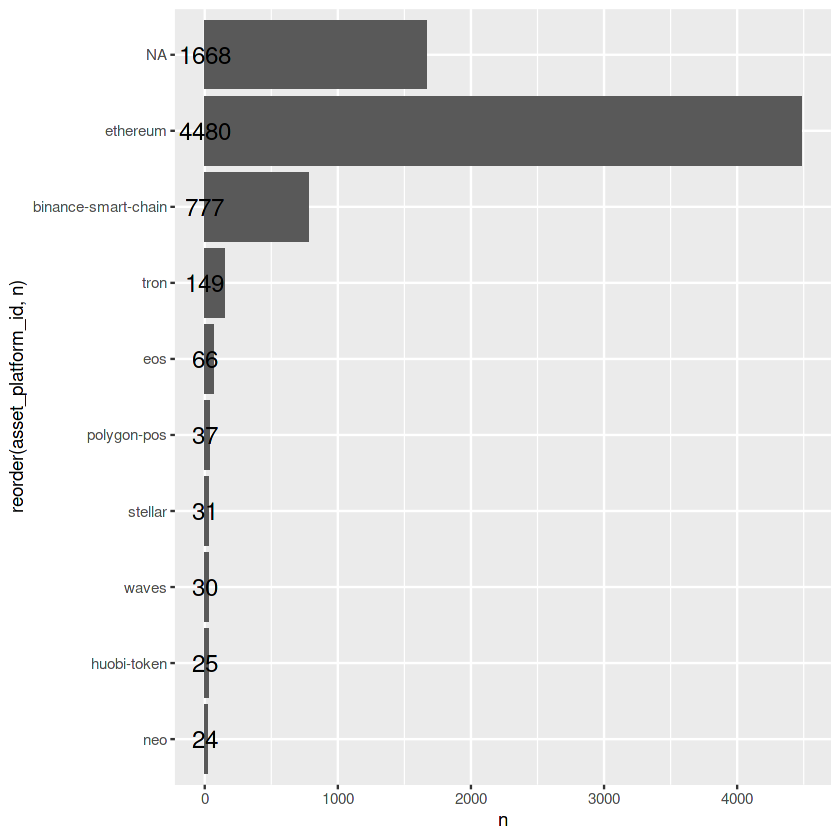

In [11]:
cmd %>% group_by(asset_platform_id) %>%
    summarise(n=n()) %>% arrange(desc(n)) %>% head(10) %>%
    ggplot(aes(x = reorder(asset_platform_id,n), y = n)) +
    geom_col() +
    geom_text(aes(label = paste(n)), y = 1, size = 5) +
    coord_flip()

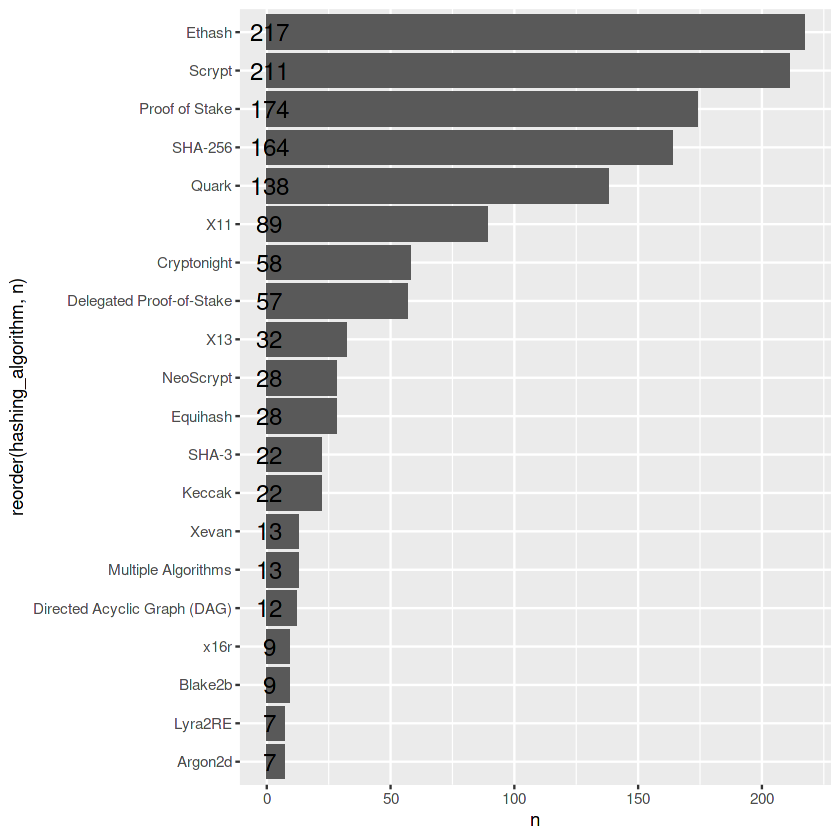

In [12]:
cmd %>% 
  select(id,hashing_algorithm) %>%
  na.omit() %>%
  group_by(hashing_algorithm) %>%
  summarise(n=n()) %>% arrange(desc(n)) %>% head(20) %>%
  ggplot(aes(x = reorder(hashing_algorithm,n), y = n))+
  geom_col()+
  geom_text(aes(label = paste(n)), y = 1, size = 5) +
  coord_flip()

In [13]:
cmd %>% filter(is.na(asset_platform_id)) %>%
  arrange(desc(liquidity_score)) %>%
  select(id,liquidity_score, symbol, name, md_current_price, coingecko_rank) %>% head(20)

id,liquidity_score,symbol,name,md_current_price,coingecko_rank
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
ethereum,100.635,eth,Ethereum,2.36604e+03,3
bitcoin,100.391,btc,Bitcoin,3.83620e+04,2
ripple,87.055,xrp,XRP,9.01118e-01,9
cardano,86.139,ada,Cardano,1.14000e+00,7
dogecoin,85.507,doge,Dogecoin,3.42034e-01,4
ethereum-classic,85.282,etc,Ethereum Classic,5.94600e+01,119
litecoin,85.238,ltc,Litecoin,1.77540e+02,13
bitcoin-cash,83.931,bch,Bitcoin Cash,6.60760e+02,121
polkadot,80.225,dot,Polkadot,2.27200e+01,135


In [14]:
cmd %>% 
  arrange(coingecko_rank) %>%
  select(id,liquidity_score, symbol, name, md_current_price, coingecko_rank) %>% head(20)

id,liquidity_score,symbol,name,md_current_price,coingecko_rank
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
silver-gateway,9.751,svs,Silver Gateway,5.11428e-01,1
bitcoin,100.391,btc,Bitcoin,3.83620e+04,2
ethereum,100.635,eth,Ethereum,2.36604e+03,3
dogecoin,85.507,doge,Dogecoin,3.42034e-01,4
eos,83.446,eos,EOS,5.28000e+00,5
binancecoin,82.233,bnb,Binance Coin,3.14600e+02,6
cardano,86.139,ada,Cardano,1.14000e+00,7
stellar,76.846,xlm,Stellar,4.01923e-01,8
ripple,87.055,xrp,XRP,9.01118e-01,9


id,md_market_cap
<chr>,<dbl>
bitcoin,718732681723
ethereum,274655095032
tether,59365623403
binancecoin,48633970804
dogecoin,44714491920
ripple,41562096020
cardano,36419511193
polkadot,22855709568
usd-coin,19707542193


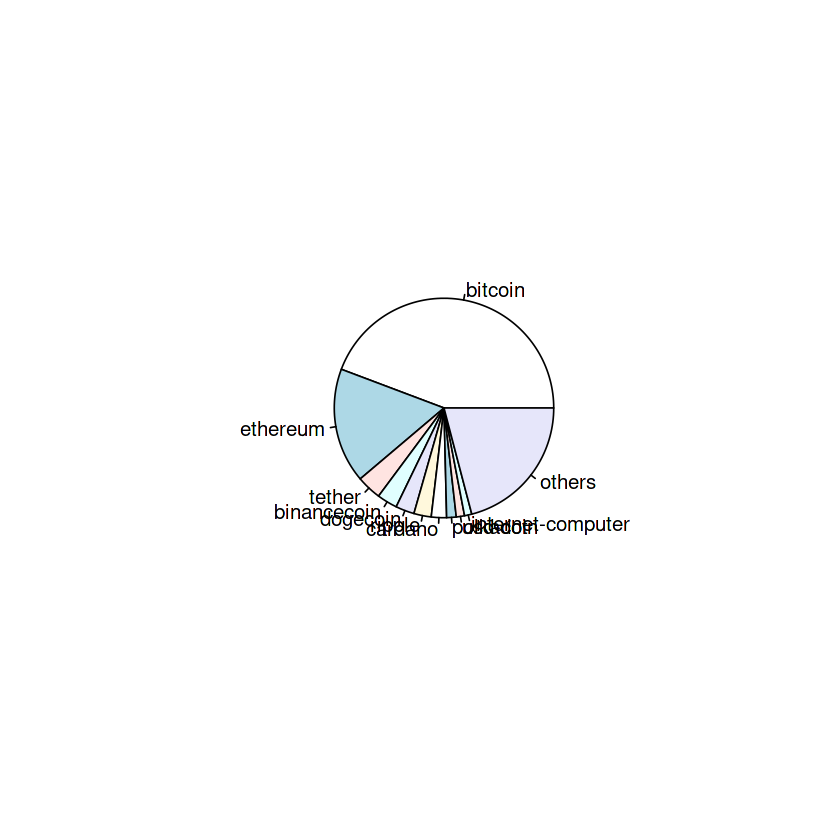

In [15]:
market_cap <- cmd %>%
    select(id, md_market_cap) %>%
    na.omit() %>%
    arrange(desc(md_market_cap))
df1 <- market_cap %>%
    head(10) %>%
    rbind(data.frame(md_market_cap=sum(market_cap[! market_cap$md_market_cap %in% head(market_cap$md_market_cap,10),"md_market_cap"]),id="others"))
df1
pie(df1$md_market_cap,df1$id)

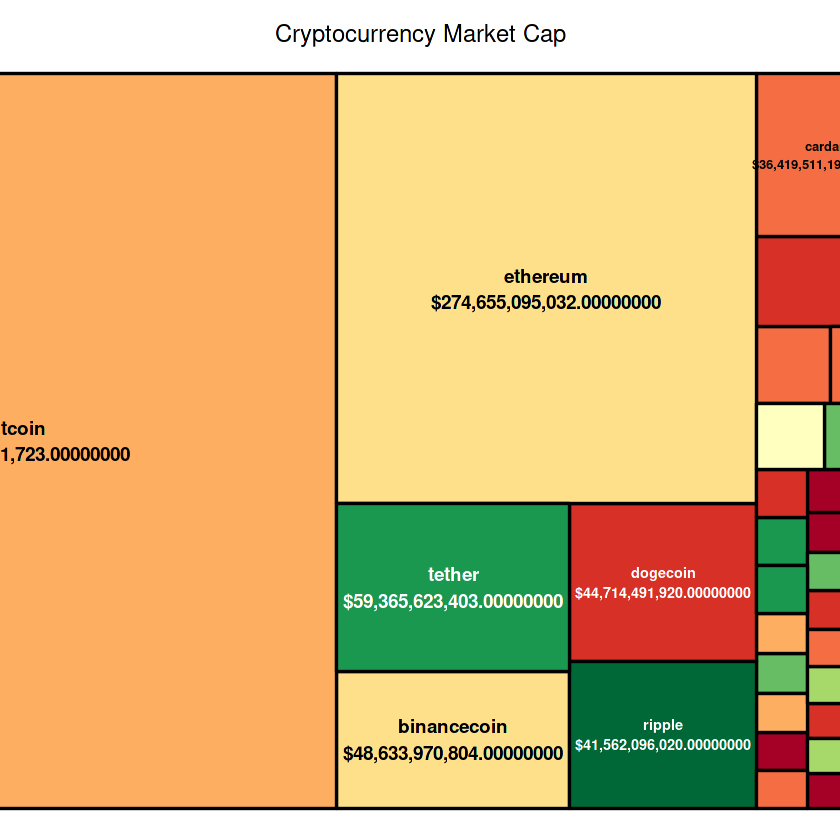

In [16]:
library(treemap)
df1 <- na.omit(cmd[,c('id','md_market_cap')])
df1$formatted_market_cap <-  paste0(df1$id,'\n','$',format(df1$md_market_cap,big.mark = ',',scientific = F, trim = T))
treemap(df1, index = 'formatted_market_cap', vSize = 'md_market_cap', title = 'Cryptocurrency Market Cap', palette='RdYlGn')

In [17]:
cmd %>% filter(is.na(asset_platform_id)) %>%
    select(id,md_current_price, md_circulating_supply) %>%
    na.omit() %>%
    arrange(desc(md_current_price))

id,md_current_price,md_circulating_supply
<chr>,<dbl>,<dbl>
blipcoin,435231.00,0.000000e+00
42-coin,75910.00,4.199995e+01
mirrored-bitcoin,38507.00,2.802831e+02
bitcoin,38362.00,1.871370e+07
rootstock,37813.00,0.000000e+00
project-x,30341.00,0.000000e+00
bankcoin-reserve,11195.42,0.000000e+00
elons,5192.60,0.000000e+00
usgold,2464.93,0.000000e+00


In [18]:
#md_circulating_supply, md_current_price, liquidity_score
#forks, stars, subscribers, reddit_subscribers, reddit_average_posts_48h, reddit_average_comments_48h, twitter_followers

In [19]:
colnames(cmd)

[1] "id"                                             
 [2] "symbol"                                         
 [3] "name"                                           
 [4] "asset_platform_id"                              
 [5] "block_time_in_minutes"                          
 [6] "hashing_algorithm"                              
 [7] "categories"                                     
 [8] "country_origin"                                 
 [9] "genesis_date"                                   
[10] "sentiment_votes_up_percentage"                  
[11] "sentiment_votes_down_percentage"                
[12] "market_cap_rank"                                
[13] "coingecko_rank"                                 
[14] "coingecko_score"                                
[15] "liquidity_score"                                
[16] "ico_data"                                       
[17] "md_current_price"                               
[18] "md_total_value_locked"                          
[19] "md_mcap_to_tvl_ratio"                           
[20] "md_fdv_to_tvl_ratio"                            
[21] "md_ath"                                         
[22] "md_ath_change_percentage"                       
[23] "md_ath_date"                                    
[24] "md_atl"                                         
[25] "md_atl_change_percentage"                       
[26] "md_atl_date"                                    
[27] "md_market_cap"                                  
[28] "md_market_cap_rank"                             
[29] "md_fully_diluted_valuation"                     
[30] "md_total_volume"                                
[31] "md_high_24h"                                    
[32] "md_low_24h"                                     
[33] "md_price_change_24h"                            
[34] "md_price_change_percentage_24h"                 
[35] "md_price_change_percentage_7d"                  
[36] "md_price_change_percentage_14d"                 
[37] "md_price_change_percentage_30d"                 
[38] "md_price_change_percentage_60d"                 
[39] "md_price_change_percentage_200d"                
[40] "md_price_change_percentage_1y"                  
[41] "md_market_cap_change_24h"                       
[42] "md_market_cap_change_percentage_24h"            
[43] "md_price_change_24h_in_currency"                
[44] "md_price_change_percentage_1h_in_currency"      
[45] "md_price_change_percentage_24h_in_currency"     
[46] "md_price_change_percentage_7d_in_currency"      
[47] "md_price_change_percentage_14d_in_currency"     
[48] "md_price_change_percentage_30d_in_currency"     
[49] "md_price_change_percentage_60d_in_currency"     
[50] "md_price_change_percentage_200d_in_currency"    
[51] "md_price_change_percentage_1y_in_currency"      
[52] "md_market_cap_change_24h_in_currency"           
[53] "md_market_cap_change_percentage_24h_in_currency"
[54] "md_total_supply"                                
[55] "md_max_supply"                                  
[56] "md_circulating_supply"                          
[57] "md_sparkline_7d"                                
[58] "md_last_updated"

In [20]:
col <- c('md_price_change_24h_in_currency', 'md_price_change_percentage_1h_in_currency', 'md_price_change_percentage_24h_in_currency',
         'md_price_change_percentage_7d_in_currency', 'md_price_change_percentage_14d_in_currency', 'md_price_change_percentage_30d_in_currency',
         'md_price_change_percentage_60d_in_currency', 'md_price_change_percentage_200d_in_currency', 'md_price_change_percentage_1y_in_currency',
         'md_market_cap_change_24h_in_currency', 'md_market_cap_change_percentage_24h_in_currency')
cmd <- cmd[, !(names(cmd) %in% col)]

In [21]:
colnames(cmd)

[1] "id"                                  "symbol"                             
 [3] "name"                                "asset_platform_id"                  
 [5] "block_time_in_minutes"               "hashing_algorithm"                  
 [7] "categories"                          "country_origin"                     
 [9] "genesis_date"                        "sentiment_votes_up_percentage"      
[11] "sentiment_votes_down_percentage"     "market_cap_rank"                    
[13] "coingecko_rank"                      "coingecko_score"                    
[15] "liquidity_score"                     "ico_data"                           
[17] "md_current_price"                    "md_total_value_locked"              
[19] "md_mcap_to_tvl_ratio"                "md_fdv_to_tvl_ratio"                
[21] "md_ath"                              "md_ath_change_percentage"           
[23] "md_ath_date"                         "md_atl"                             
[25] "md_atl_change_percentage"            "md_atl_date"                        
[27] "md_market_cap"                       "md_market_cap_rank"                 
[29] "md_fully_diluted_valuation"          "md_total_volume"                    
[31] "md_high_24h"                         "md_low_24h"                         
[33] "md_price_change_24h"                 "md_price_change_percentage_24h"     
[35] "md_price_change_percentage_7d"       "md_price_change_percentage_14d"     
[37] "md_price_change_percentage_30d"      "md_price_change_percentage_60d"     
[39] "md_price_change_percentage_200d"     "md_price_change_percentage_1y"      
[41] "md_market_cap_change_24h"            "md_market_cap_change_percentage_24h"
[43] "md_total_supply"                     "md_max_supply"                      
[45] "md_circulating_supply"               "md_sparkline_7d"                    
[47] "md_last_updated"

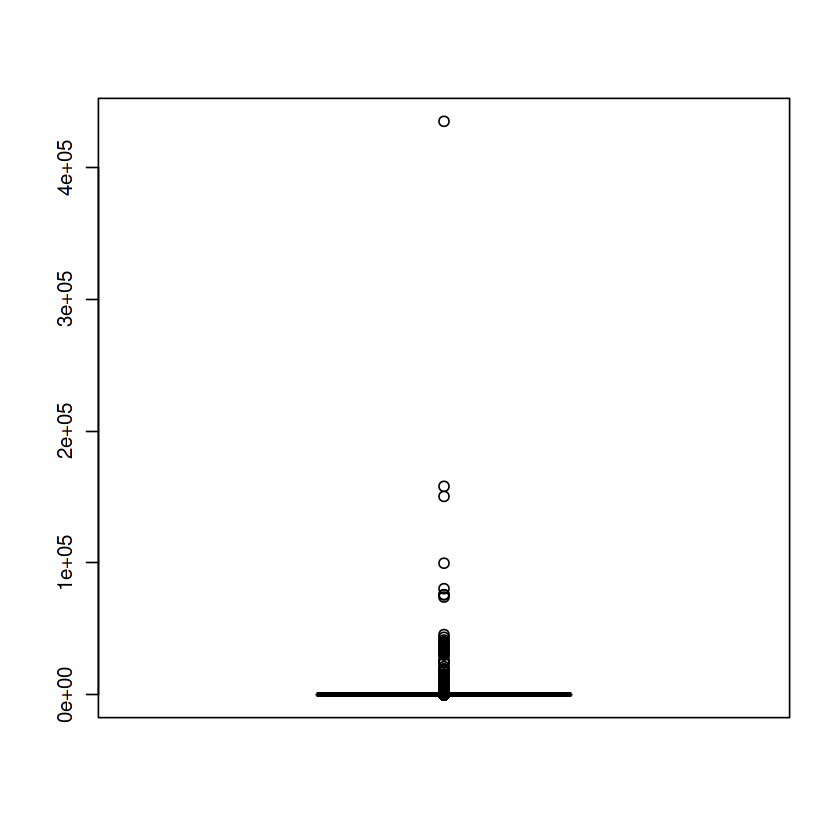

In [22]:
boxplot(cmd$md_current_price)

In [23]:
library(psych)
describe(cmd)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id*,1,7459,3.730000e+03,2.153372e+03,3.730000e+03,3.730000e+03,2.765049e+03,1.000000e+00,7.459000e+03,7.458000e+03,0.000000e+00,-1.20048265,2.493324e+01
symbol*,2,7458,3.246540e+03,1.892309e+03,3.252500e+03,3.240209e+03,2.441101e+03,1.000000e+00,6.564000e+03,6.563000e+03,1.838624e-02,-1.21034980,2.191194e+01
name*,3,7459,3.730000e+03,2.153372e+03,3.730000e+03,3.730000e+03,2.765049e+03,1.000000e+00,7.459000e+03,7.458000e+03,0.000000e+00,-1.20048265,2.493324e+01
asset_platform_id*,4,5791,1.421084e+01,7.706776e+00,1.400000e+01,1.344938e+01,0.000000e+00,1.000000e+00,5.000000e+01,4.900000e+01,2.457742e+00,8.13926433,1.012735e-01
block_time_in_minutes,5,7459,1.988007e+03,1.242472e+05,0.000000e+00,1.390518e-02,0.000000e+00,-2.000000e+00,1.009458e+07,1.009458e+07,7.512069e+01,5928.22354012,1.438621e+03
hashing_algorithm*,6,1371,2.863384e+01,1.207604e+01,3.200000e+01,2.884777e+01,1.037820e+01,1.000000e+00,5.200000e+01,5.100000e+01,-2.780593e-01,-1.01086179,3.261414e-01
categories*,7,7459,4.480940e+02,1.812953e+02,5.750000e+02,4.785946e+02,0.000000e+00,1.000000e+00,5.750000e+02,5.740000e+02,-1.077457e+00,-0.39440050,2.099163e+00
country_origin*,8,3357,7.057432e+01,3.931656e+01,6.500000e+01,7.119017e+01,5.782140e+01,1.000000e+00,1.330000e+02,1.320000e+02,3.273380e-03,-1.50851485,6.785780e-01
genesis_date*,9,926,3.343790e+02,1.682260e+02,3.520000e+02,3.381523e+02,1.808772e+02,1.000000e+00,6.390000e+02,6.380000e+02,-2.186586e-01,-0.91649299,5.528249e+00


In [24]:
describe(pod)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
forks,1,7457,1.473340e+01,3.726661e+02,0.000,2.545668e-01,0.000000e+00,0,29231.000,29231.000,68.483355,5170.85691749,4.315567e+00
stars,2,7457,3.775070e+01,7.685227e+02,0.000,3.591419e-01,0.000000e+00,0,53934.000,53934.000,55.682114,3582.52425956,8.899685e+00
subscribers,3,7457,4.820974e+00,5.717826e+01,0.000,3.056812e-01,0.000000e+00,0,3811.000,3811.000,48.105749,2895.59322882,6.621385e-01
total_issues,4,7457,1.661325e+01,1.879830e+02,0.000,2.362996e-02,0.000000e+00,0,6229.000,6229.000,21.491459,563.37428382,2.176890e+00
closed_issues,5,7457,1.406008e+01,1.660098e+02,0.000,8.379420e-04,0.000000e+00,0,5760.000,5760.000,23.327081,670.94764836,1.922435e+00
pull_requests_merged,6,7457,2.886737e+01,2.776798e+02,0.000,3.720463e-02,0.000000e+00,0,12639.000,12639.000,22.661330,768.11468653,3.215602e+00
pull_request_contributors,7,7457,1.437173e+00,1.315016e+01,0.000,2.865762e-02,0.000000e+00,0,728.000,728.000,34.984284,1647.05758056,1.522821e-01
code_additions_deletions_4_weeks*,8,7457,2.334565e+02,1.169882e+02,295.000,2.547955e+02,0.000000e+00,1,295.000,294.000,-1.428332,0.09457219,1.354753e+00
commit_count_4_weeks,9,7457,1.692101e+00,1.864748e+01,0.000,0.000000e+00,0.000000e+00,0,642.000,642.000,19.235287,458.04050166,2.159425e-01


In [25]:
summary(pod)

     forks              stars           subscribers        total_issues    
 Min.   :    0.00   Min.   :    0.00   Min.   :   0.000   Min.   :   0.00  
 1st Qu.:    0.00   1st Qu.:    0.00   1st Qu.:   0.000   1st Qu.:   0.00  
 Median :    0.00   Median :    0.00   Median :   0.000   Median :   0.00  
 Mean   :   14.73   Mean   :   37.75   Mean   :   4.821   Mean   :  16.61  
 3rd Qu.:    0.00   3rd Qu.:    0.00   3rd Qu.:   0.000   3rd Qu.:   0.00  
 Max.   :29231.00   Max.   :53934.00   Max.   :3811.000   Max.   :6229.00  
 NA's   :2          NA's   :2          NA's   :2          NA's   :2        
 closed_issues     pull_requests_merged pull_request_contributors
 Min.   :   0.00   Min.   :    0.00     Min.   :  0.000          
 1st Qu.:   0.00   1st Qu.:    0.00     1st Qu.:  0.000          
 Median :   0.00   Median :    0.00     Median :  0.000          
 Mean   :  14.06   Mean   :   28.87     Mean   :  1.437          
 3rd Qu.:   0.00   3rd Qu.:    0.00     3rd Qu.:  0.000       


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




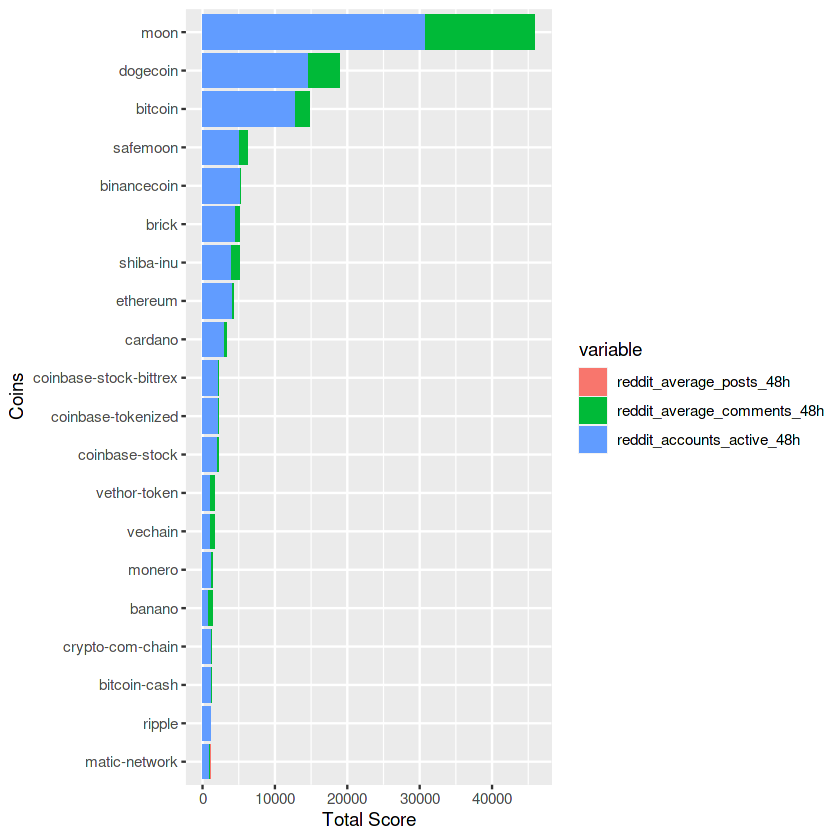

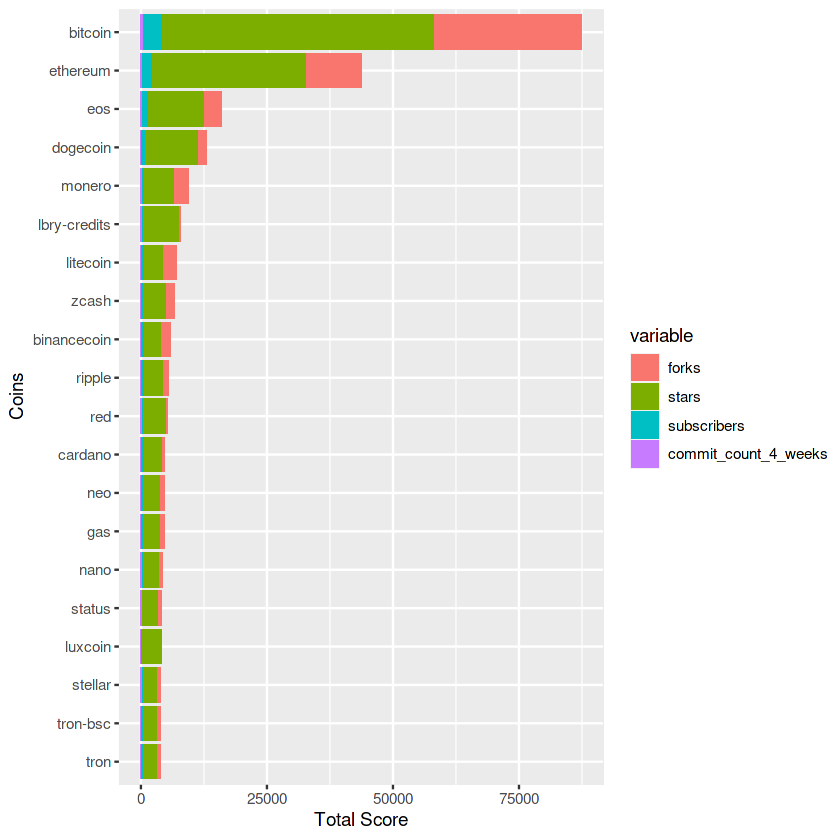

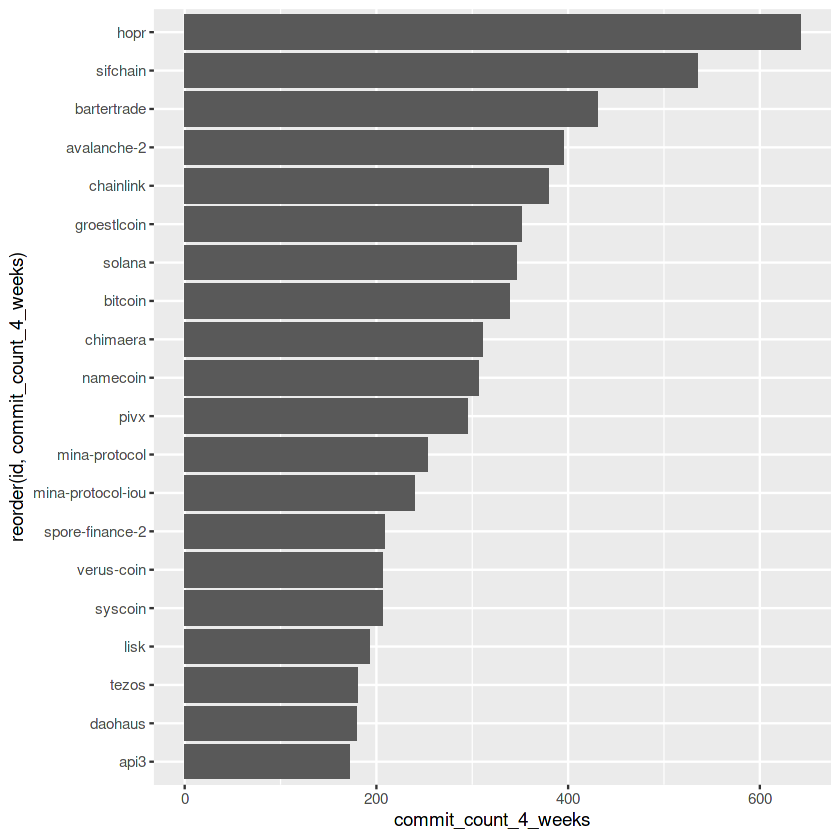

In [26]:
# Top 20 popular coins 
library(reshape2)

top_coins <- pod %>%
    select(id, forks, stars, subscribers, commit_count_4_weeks, twitter_followers,
           reddit_average_posts_48h, reddit_average_comments_48h, reddit_subscribers, reddit_accounts_active_48h) %>%
    mutate(sum = reddit_average_posts_48h + reddit_average_comments_48h + reddit_accounts_active_48h) %>%
    top_n(20, wt=sum)

pod %>% 
    select(id, reddit_average_posts_48h, reddit_average_comments_48h, reddit_accounts_active_48h) %>%
    na.omit() %>%
    filter(id %in% top_coins$id) %>%
    melt(id="id") %>%
    ggplot(aes(x = reorder(id, value), y = value, fill = variable))+
    geom_col() +
    labs(x = 'Coins', y = 'Total Score') +
    coord_flip()

# Top 20 coins that are being actively developed(based on github data)
top_coins1 <- pod %>%
    select(id, forks, stars, subscribers, commit_count_4_weeks, twitter_followers,
           reddit_average_posts_48h, reddit_average_comments_48h, reddit_subscribers, reddit_accounts_active_48h) %>%
    mutate(sum = forks + stars + subscribers + commit_count_4_weeks) %>%
    top_n(20, wt=sum)

pod %>% 
    select(id, forks, stars, subscribers, commit_count_4_weeks) %>%
    na.omit() %>%
    filter(id %in% top_coins1$id) %>%
    melt(id="id") %>%
    ggplot(aes(x = reorder(id, value), y = value, fill = variable))+
    geom_col() +
    labs(x = 'Coins', y = 'Total Score') +
    coord_flip()

pod %>% 
    select(id, commit_count_4_weeks) %>%
    na.omit() %>%
    top_n(20, wt = commit_count_4_weeks) %>%
    ggplot(aes(x = reorder(id,commit_count_4_weeks), y = commit_count_4_weeks)) +
    geom_col() +
    coord_flip()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_smooth()` using formula 'y ~ x'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



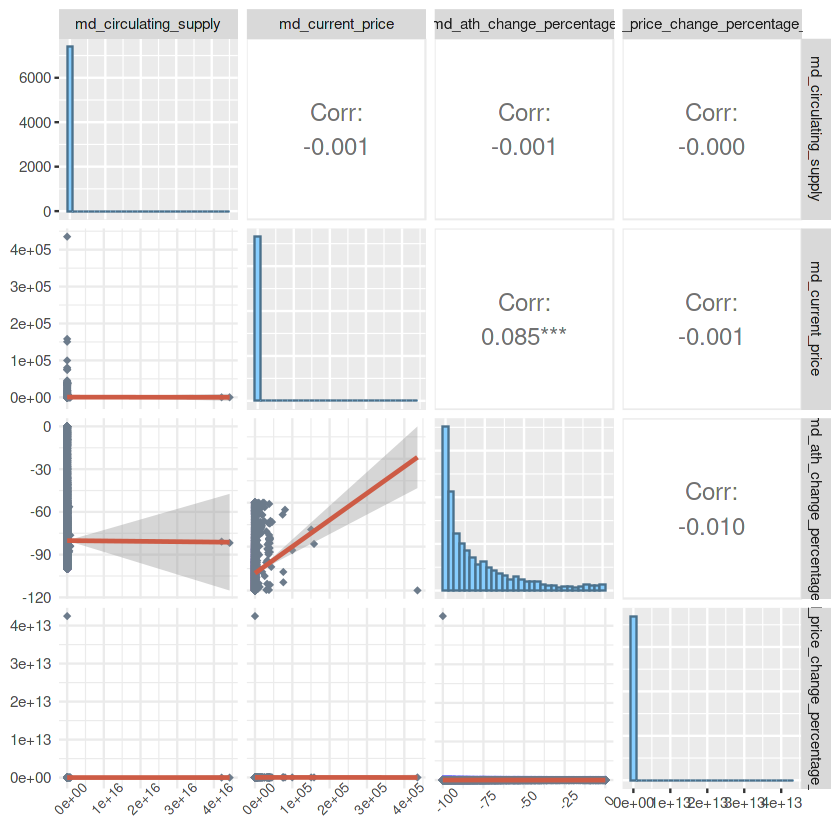

In [27]:
library(GGally)
lowerFn <- function(data, mapping, method = "lm") {
  ggplot(data = data, mapping = mapping) +
    geom_point(colour = "slategray4", size = 2, shape = 18) +
    geom_smooth(method = method, color = "coral3") +
    theme_minimal() +
    theme(axis.text.x = element_text(size = 8, angle = 45))
}
cmd %>% 
  select(md_circulating_supply, md_current_price, md_ath_change_percentage, md_price_change_percentage_1y) %>% 
  na.omit() %>% 
  ggpairs(lower = list(continuous = wrap(lowerFn, method = "lm")),
    diag = list(continuous = wrap("barDiag", fill = 'skyblue1', colour = "skyblue4")),
    upper = list(continuous = wrap("cor", size = 5)),
    progress = FALSE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_smooth()` using formula 'y ~ x'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`geom_s

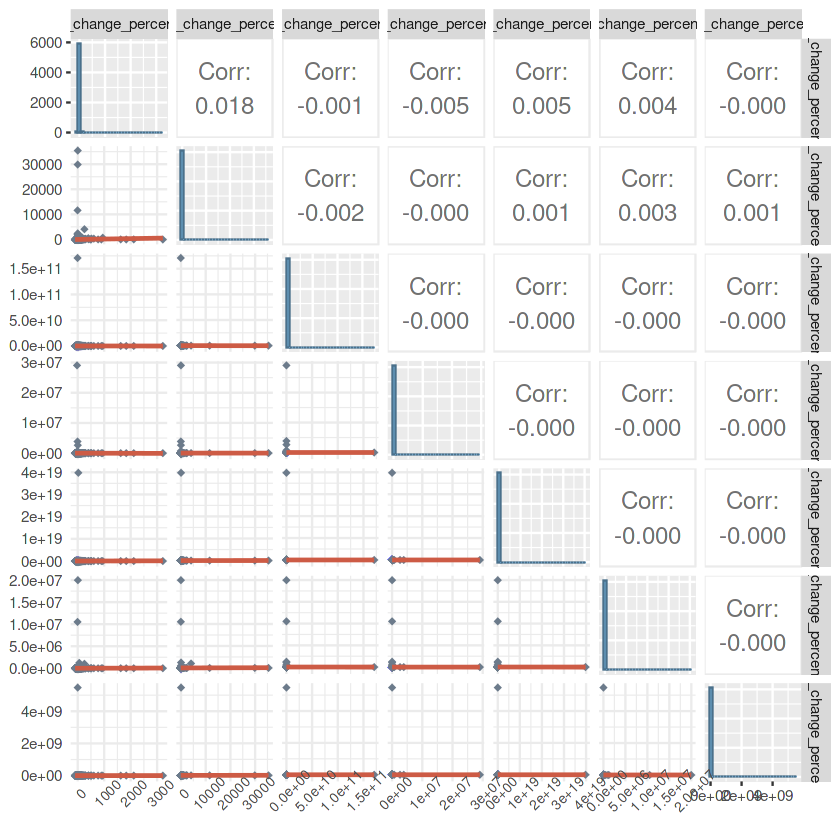

In [28]:
cmd %>% 
  select(md_price_change_percentage_24h, md_price_change_percentage_7d, md_price_change_percentage_14d, 
         md_price_change_percentage_30d, md_price_change_percentage_60d, md_price_change_percentage_200d, 
         md_price_change_percentage_1y) %>% 
  na.omit() %>% 
  ggpairs(lower = list(continuous = wrap(lowerFn, method = "lm")),
    diag = list(continuous = wrap("barDiag", fill = 'skyblue1', colour = "skyblue4")),
    upper = list(continuous = wrap("cor", size = 5)),
    progress = FALSE)

In [29]:
library(corrplot)

corrplot 0.88 loaded



In [ ]:
corr <- cor(cmd[, unlist(lapply(cmd, is.numeric))])
corr
# corrplot(corr, type = "upper", order = "hclust",)

In [ ]:
ncol(cmd)

 [1] "id"                                  "symbol"                             
 [3] "name"                                "asset_platform_id"                  
 [5] "block_time_in_minutes"               "categories"                         
 [7] "sentiment_votes_up_percentage"       "sentiment_votes_down_percentage"    
 [9] "coingecko_rank"                      "coingecko_score"                    
[11] "liquidity_score"                     "md_current_price"                   
[13] "md_ath"                              "md_ath_change_percentage"           
[15] "md_ath_date"                         "md_atl"                             
[17] "md_atl_change_percentage"            "md_atl_date"                        
[19] "md_market_cap"                       "md_total_volume"                    
[21] "md_high_24h"                         "md_low_24h"                         
[23] "md_price_change_24h"                 "md_price_change_percentage_24h"     
[25] "md_price_change_percen

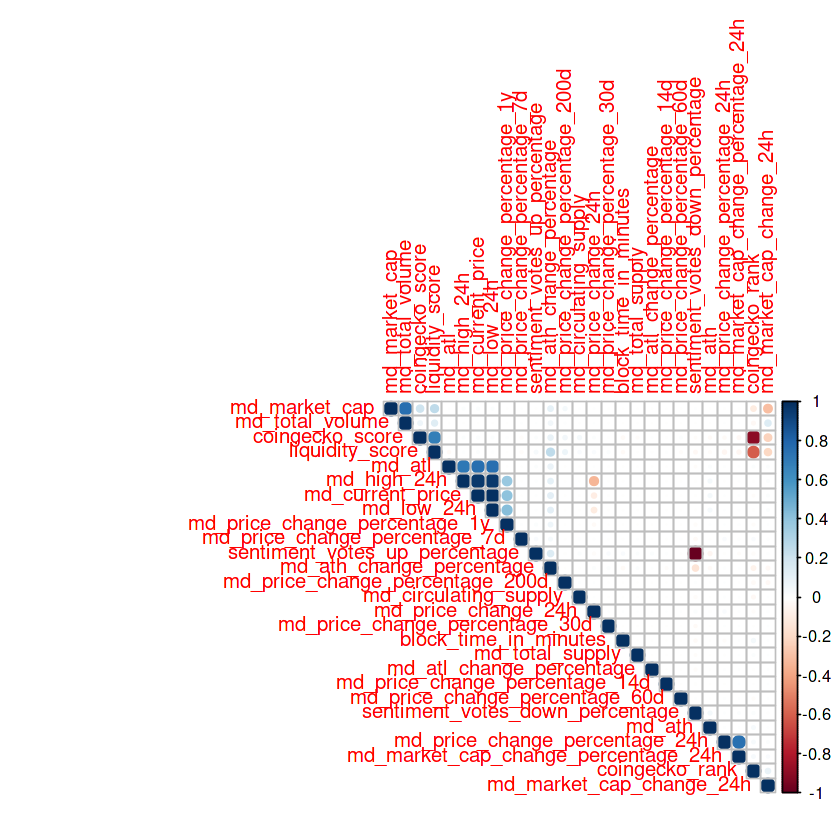

In [30]:
cols <- c()
for(i in colnames(cmd)){
    if(sum(!is.na(cmd[i])) >= 3798){
        cols <- c(cols, i)
    }
}
print(cols)
cmd1 <- cmd[, (colnames(cmd) %in% cols)]
cmd1 <- na.omit(cmd1)
corr <- cor(cmd1[, unlist(lapply(cmd1, is.numeric))])
# corr
corrplot(corr, type = "upper", order = "hclust")

**HYPOTHISIS TESTING**

In [31]:
mod1<- md_price_change_percentage_24h~md_price_change_percentage_7d+md_price_change_percentage_14d
fit1<-lm(mod1, data = cmd)
summary(fit1)


Call:
lm(formula = mod1, data = cmd)

Residuals:
   Min     1Q Median     3Q    Max 
 -98.6  -10.7   -2.8    2.8 3217.4 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)
(Intercept)                    -1.363e+00  8.684e-01  -1.570    0.116
md_price_change_percentage_7d   2.027e-03  1.406e-03   1.441    0.150
md_price_change_percentage_14d -3.244e-11  3.976e-10  -0.082    0.935

Residual standard error: 67.92 on 6119 degrees of freedom
  (1337 observations deleted due to missingness)
Multiple R-squared:  0.0003405,	Adjusted R-squared:  1.379e-05 
F-statistic: 1.042 on 2 and 6119 DF,  p-value: 0.3527


In [32]:
t.test(cmd$md_price_change_percentage_7d, cmd$md_price_change_percentage_14d)


	Welch Two Sample t-test

data:  cmd$md_price_change_percentage_7d and cmd$md_price_change_percentage_14d
t = -1, df = 7458, p-value = 0.3173
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -67804428  21994975
sample estimates:
    mean of x     mean of y 
-1.029045e+01  2.290472e+07 


In [33]:
anova1 <- aov(mod1, data = cmd)
summary(anova1)

                                 Df   Sum Sq Mean Sq F value Pr(>F)
md_price_change_percentage_7d     1     9586    9586   2.078  0.150
md_price_change_percentage_14d    1       31      31   0.007  0.935
Residuals                      6119 28230954    4614               
1337 observations deleted due to missingness

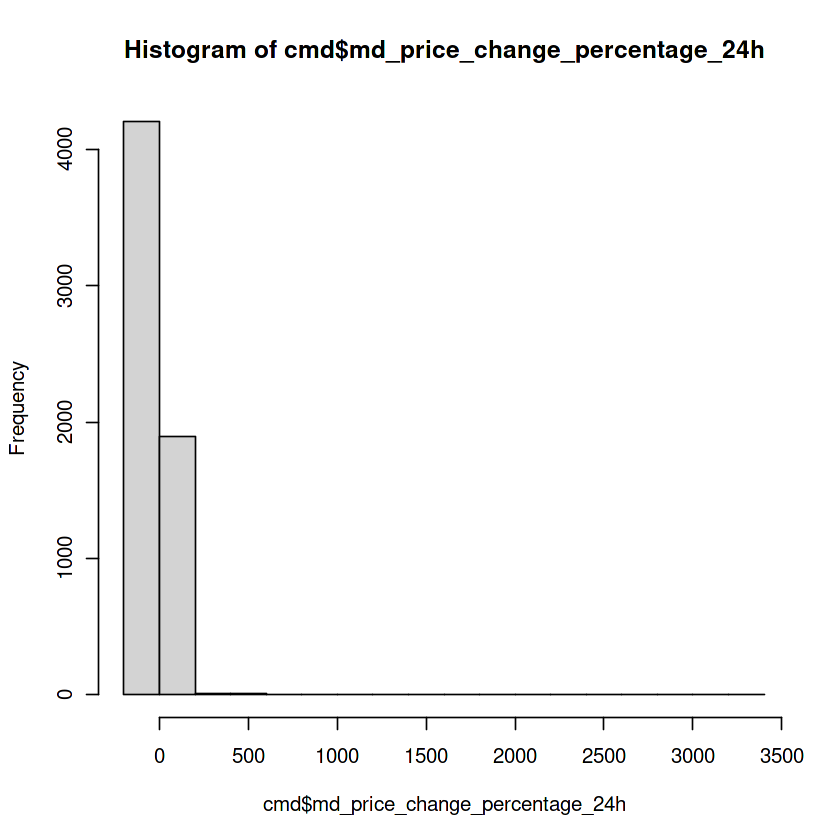

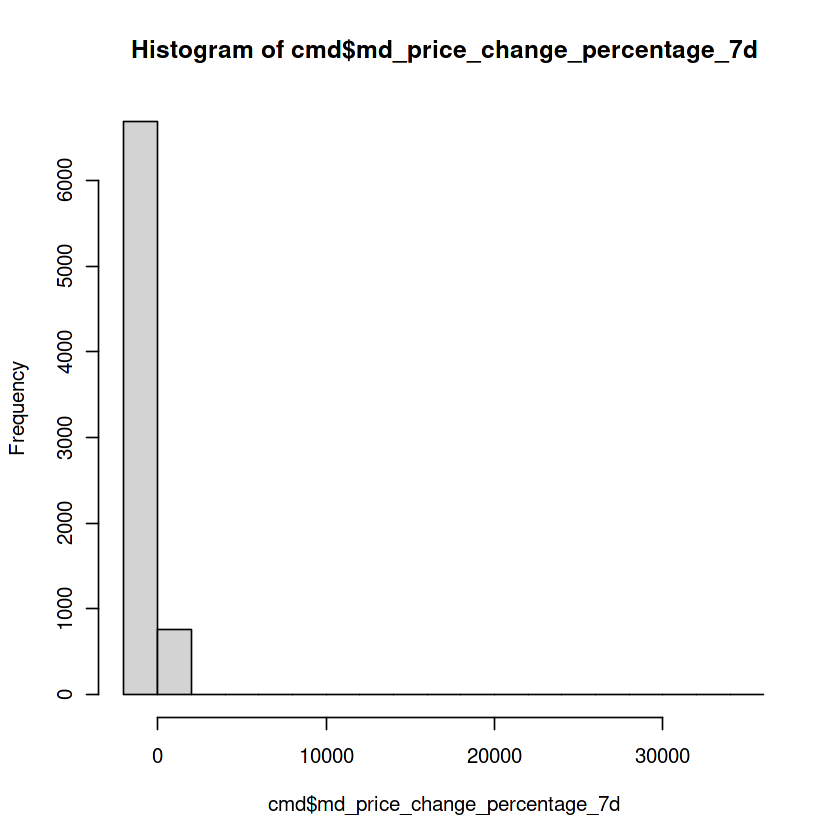

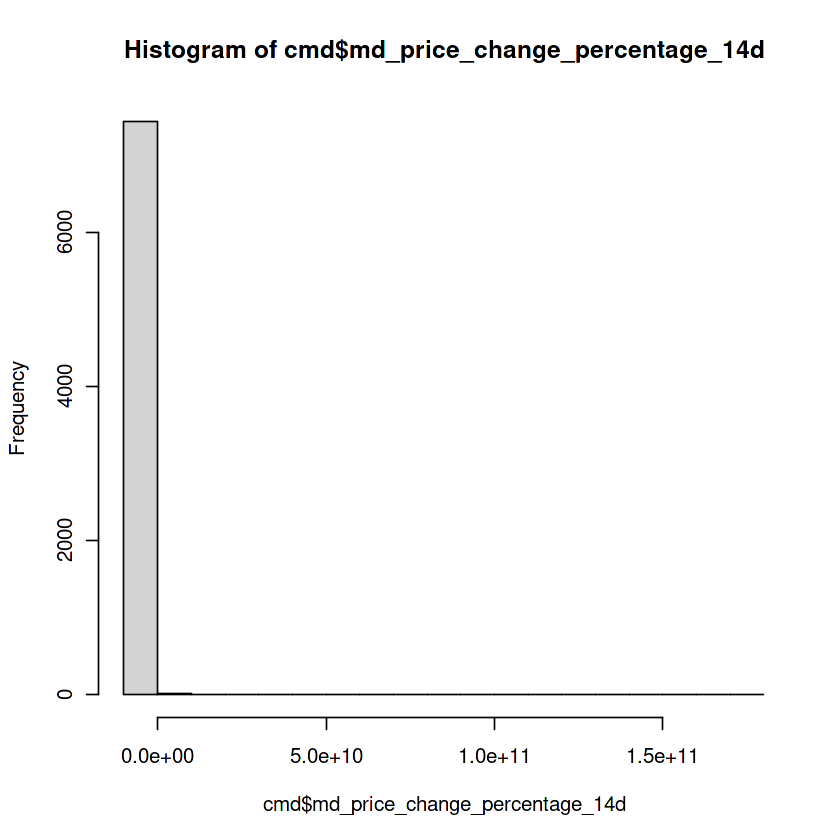

In [34]:
hist(cmd$md_price_change_percentage_24h)
hist(cmd$md_price_change_percentage_7d)
hist(cmd$md_price_change_percentage_14d)

**CLUSTERING**

In [35]:
library(clustertend)
library(cluster)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [36]:
c_df1 <- cmd %>%
    select(id, md_circulating_supply, md_current_price, liquidity_score) %>% 
    na.omit()
print(dim(c_df1))
# hopkins(c_df1[,2:4], n=nrow(c_df1)-1)

[1] 7391    4


In [37]:
c_df1 <- cmd %>%
    select(id, md_circulating_supply, md_current_price, md_ath_change_percentage, md_total_volume, coingecko_score, liquidity_score) %>% 
    na.omit()
print(dim(c_df1))

[1] 7391    7


In [38]:
c_df2 <- scale(c_df1[,2:6])
head(c_df2)

md_circulating_supply,md_current_price,md_ath_change_percentage,md_total_volume,coingecko_score
-0.01757555,5.64273005,1.6469403,29.34793463,6.4399859
-0.01757557,-0.07042533,-0.5038442,-0.02691558,1.0634154
-0.01757558,2.14034157,2.2569243,-0.02688352,-0.9330639
-0.01757558,2.67799358,2.3530290,-0.02690723,-0.9457382
-0.01757558,1.79417306,2.1174197,-0.02691687,-0.9330639
-0.01757558,2.20245028,3.0801292,-0.02691863,-0.9514324


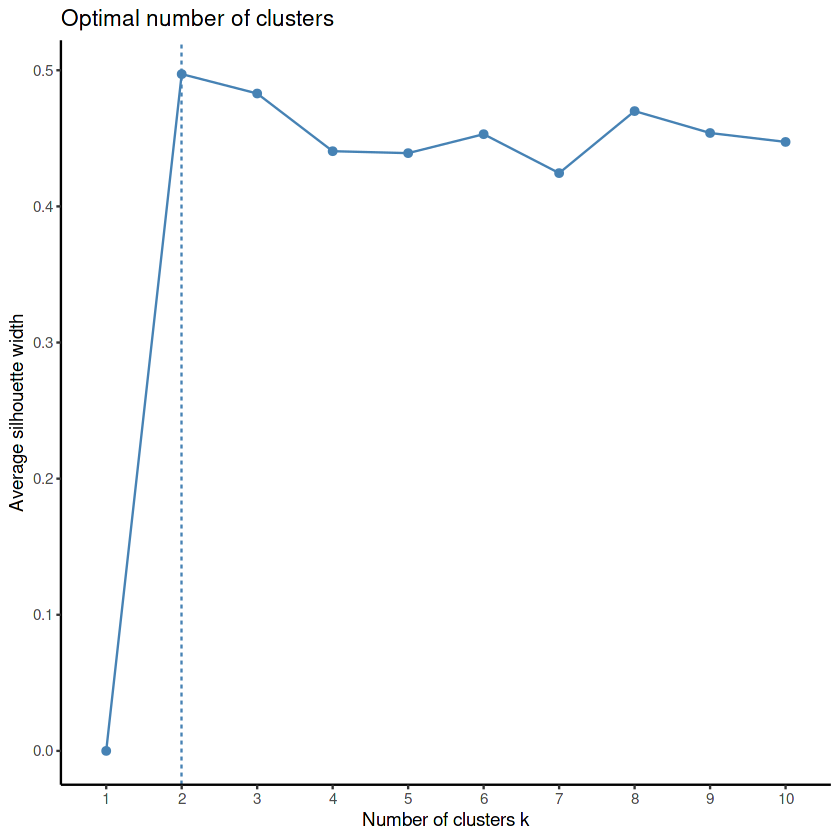

In [39]:
fviz_nbclust(c_df2, kmeans, method = "silhouette") + theme_classic()

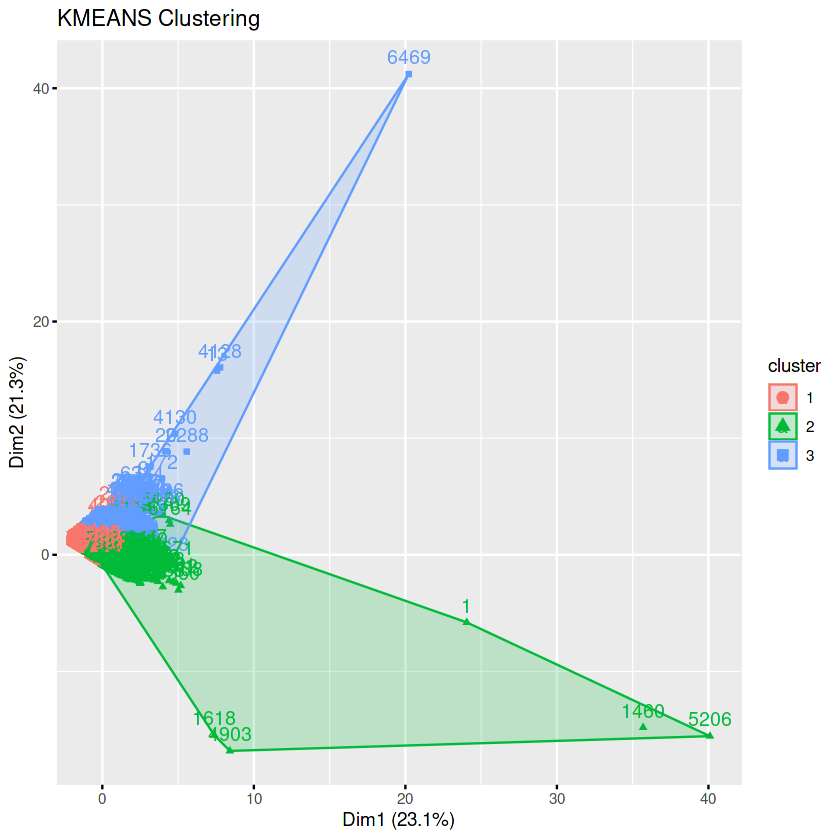

In [40]:
res.km <-eclust(c_df2, "kmeans", hc_metric="euclidean",k=3)

In [41]:
res.km

K-means clustering with 3 clusters of sizes 4492, 1752, 1147

Cluster means:
  md_circulating_supply md_current_price md_ath_change_percentage
1           -0.01724655      -0.06184674              -0.45053117
2            0.05572452      -0.04737055              -0.09031705
3           -0.01757442       0.31456736               1.90237270
  md_total_volume coingecko_score
1     -0.02656424      -0.4641020
2      0.08142433       1.4207148
3     -0.02033901      -0.3525248

Clustering vector:
   [1] 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 2 2 3 1 1
  [38] 1 1 3 2 3 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
  [75] 3 1 1 3 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 3 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 3 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 3 3 1 1 2 1 1 1 1 1 1 1 3 1
 [186] 1 1 2 1 1 1 3 1 2 3 3 3 3 3 3 1 1 3 2 3 2 3 2 3 2 3 2 1 1 3 2 3 2 3 3 3 2
 [223] 3 1 3 3 3 

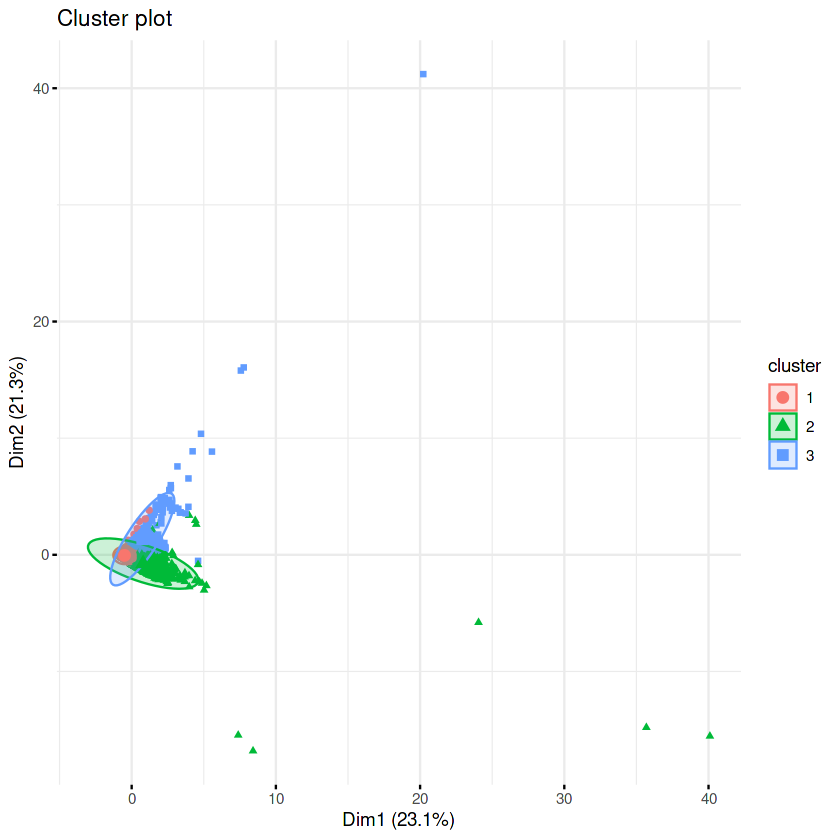

In [42]:
fviz_cluster(res.km, geom = "point", ellipse.type = "norm", ggtheme = theme_minimal())

In [43]:
df2 <- select(cmd, id, asset_platform_id)
c_df1 <- left_join(c_df1, df2, by = "id")
head(c_df1)

id,md_circulating_supply,md_current_price,md_ath_change_percentage,md_total_volume,coingecko_score,liquidity_score,asset_platform_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
bitcoin,18713700,3.836200e+04,-40.80338,8.038165e+10,80.479,100.391,NA
01coin,10646361,2.671480e-03,-92.18446,1.226970e+04,21.938,1.000,NA
0-5x-long-algorand-token,0,1.484459e+04,-26.23119,9.999500e+04,0.200,1.000,ethereum
0-5x-long-altcoin-index-token,0,1.845475e+04,-23.93530,3.513600e+04,0.062,0.310,ethereum
0-5x-long-balancer-token,0,1.252018e+04,-29.56388,8.744970e+03,0.200,1.000,ethereum
0-5x-long-bitcoin-cash-token,0,1.526163e+04,-6.56527,3.932310e+03,0.000,0.000,ethereum


In [44]:
c_df1$cluster <- res.km$cluster
c_df1 %>% 
    group_by(cluster) %>%
    slice_max(order_by = coingecko_score,n = 7)

c_df1 %>%
    filter(id == "chainlink")

id,md_circulating_supply,md_current_price,md_ath_change_percentage,md_total_volume,coingecko_score,liquidity_score,asset_platform_id,cluster
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
lightpaycoin,0.000000e+00,2.170915e-02,-99.91057,2.171000e+01,16.761,1.000,NA,1
dimcoin,2.102483e+09,9.996000e-05,-99.96072,1.000000e+01,16.698,0.000,nem,1
cappasity,0.000000e+00,3.092680e-03,-99.35413,4.827300e+04,16.644,9.147,ethereum,1
hilux,1.043483e+07,8.292100e-04,-98.61603,1.680000e+00,16.626,1.000,NA,1
lition,8.783512e+07,6.620860e-03,-98.21895,1.608196e+04,16.605,1.000,ethereum,1
liquidity-network,5.221878e+07,9.215160e-03,-99.42599,6.786500e+04,16.587,3.422,ethereum,1
gentarium,5.381715e+06,1.612052e-02,-99.48856,1.640000e+01,16.566,1.000,NA,1
bitcoin,1.871370e+07,3.836200e+04,-40.80338,8.038165e+10,80.479,100.391,NA,2
ethereum,1.159805e+08,2.366040e+03,-45.64788,1.413929e+11,77.576,100.635,NA,2


id,md_circulating_supply,md_current_price,md_ath_change_percentage,md_total_volume,coingecko_score,liquidity_score,asset_platform_id,cluster
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
chainlink,428009554,16.72,-67.51993,2000646684,64.118,77.156,ethereum,2


In [47]:
# Using Partitioning Around Medoids
fviz_nbclust(c_df2,pam, method = "silhouette") + theme_classic()

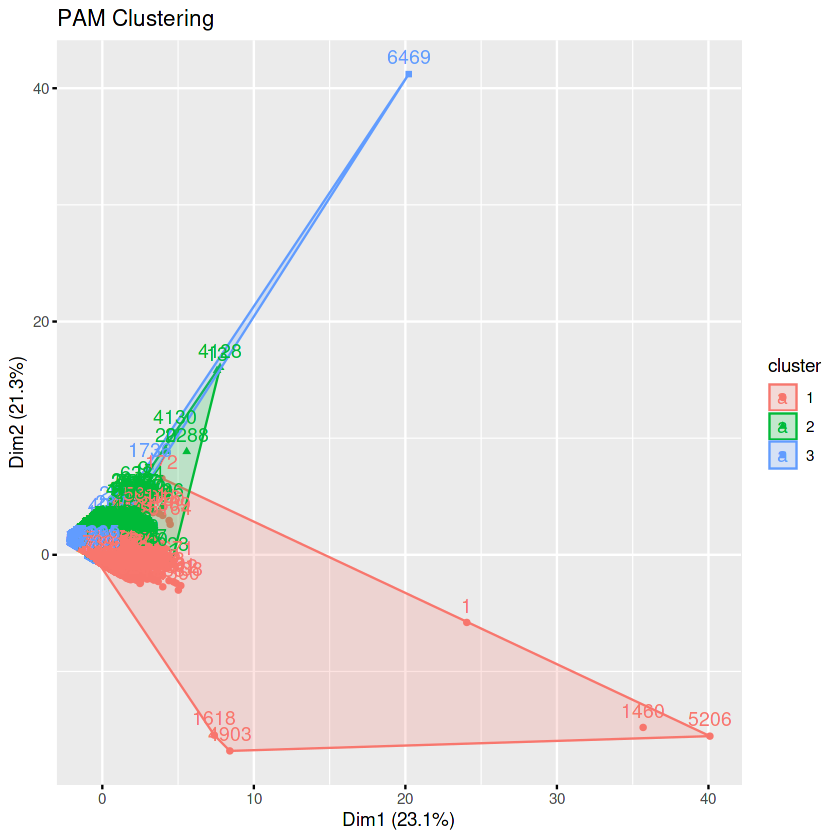

In [50]:
pam.res <- eclust(c_df2, "pam", k = 3, hc_metric="euclidean")

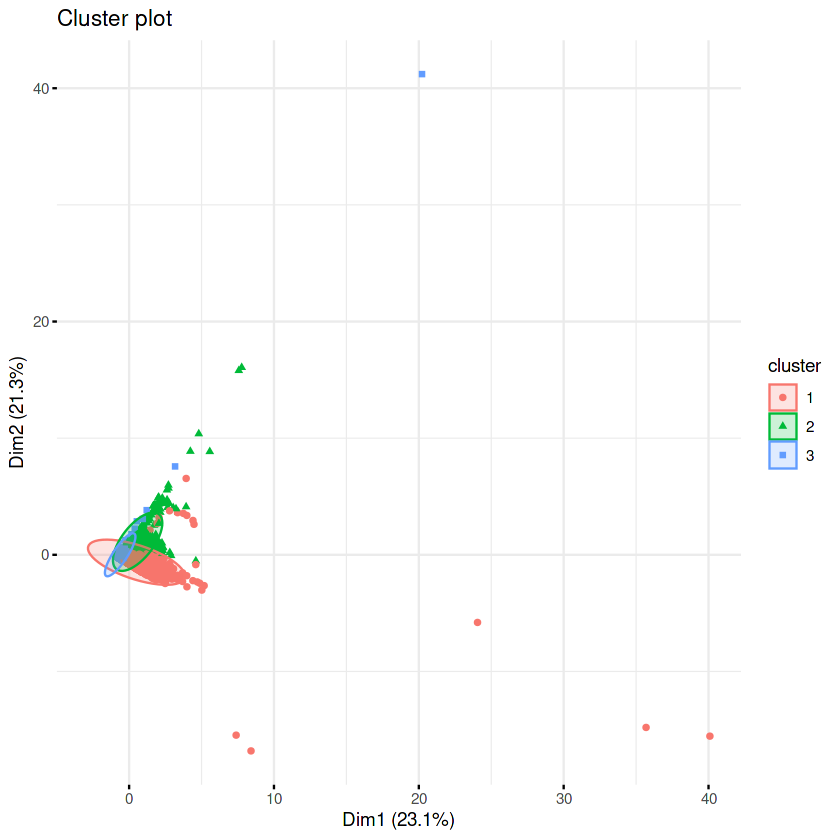

In [51]:
fviz_cluster(pam.res, geom = "point", ellipse.type = "norm", ggtheme = theme_minimal())

In [52]:
pam.res$clusinfo

size,max_diss,av_diss,diameter,separation
2538,62.30673,0.9948755,87.53293,0.007520285
1423,23.55546,1.1426882,24.03467,0.012946979
3430,64.81840,0.4188246,64.83250,0.007520285


In [53]:
c_df1$pcluster <- pam.res$clustering
# head(c_df1)
c_df1 %>% 
    group_by(pcluster) %>%
    slice_max(order_by = coingecko_score,n = 7)

id,md_circulating_supply,md_current_price,md_ath_change_percentage,md_total_volume,coingecko_score,liquidity_score,asset_platform_id,cluster,pcluster
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>
bitcoin,18713700,3.836200e+04,-40.80338,8.038165e+10,80.479,100.391,NA,2,1
ethereum,115980456,2.366040e+03,-45.64788,1.413929e+11,77.576,100.635,NA,2,1
dogecoin,129707901212,3.420340e-01,-53.03660,6.910886e+09,72.131,85.507,NA,2,1
eos,957660558,5.280000e+00,-76.74584,4.683260e+09,67.251,83.446,eos,2,1
binancecoin,154533652,3.146000e+02,-54.18894,4.659247e+09,66.874,82.233,binancecoin,2,1
cardano,32066390668,1.140000e+00,-53.07300,6.196208e+09,66.017,86.139,NA,2,1
stellar,23107442288,4.019230e-01,-53.61976,1.733884e+09,65.245,76.846,NA,2,1
dai,4064376026,9.902140e-01,-18.76367,1.125371e+09,40.359,72.443,ethereum,2,2
paxos-standard,1419829455,9.992850e-01,-11.21073,1.099693e+08,40.300,55.165,ethereum,2,2


In [54]:
p_df1 <- pod %>%
    select(id, community_score, stars, reddit_accounts_active_48h, reddit_average_comments_48h,
           developer_score, commit_count_4_weeks) %>% 
    na.omit()
print(dim(p_df1))

[1] 7457    7


In [55]:
p_df2 <- scale(p_df1[,2:7])
head(p_df2)

community_score,stars,reddit_accounts_active_48h,reddit_average_comments_48h,developer_score,commit_count_4_weeks
5.690806,70.12967668,28.68326425,11.24894366,5.2485493,18.08865405
0.394753,-0.03090436,-0.03327772,-0.02480121,2.0968303,-0.09074154
-1.012249,-0.04912113,-0.04462544,-0.02480121,-0.4733738,-0.09074154
-1.012249,-0.04912113,-0.04462544,-0.02480121,-0.4733738,-0.09074154
-1.012249,-0.04912113,-0.04462544,-0.02480121,-0.4733738,-0.09074154
-1.012249,-0.04912113,-0.04462544,-0.02480121,-0.4733738,-0.09074154


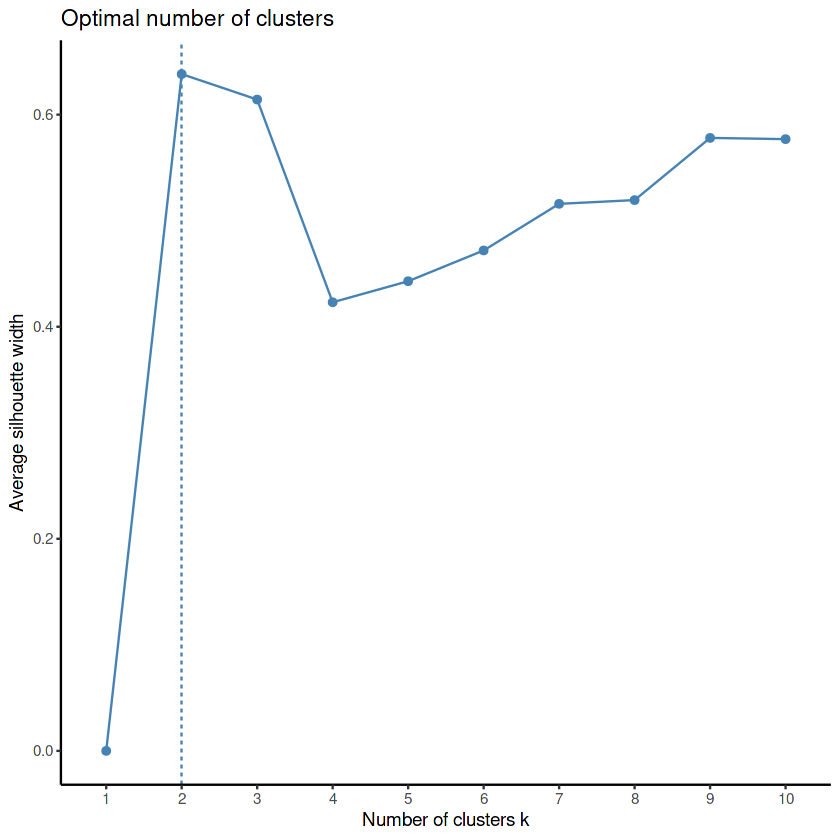

In [56]:
fviz_nbclust(p_df2, kmeans, method = "silhouette") + theme_classic()

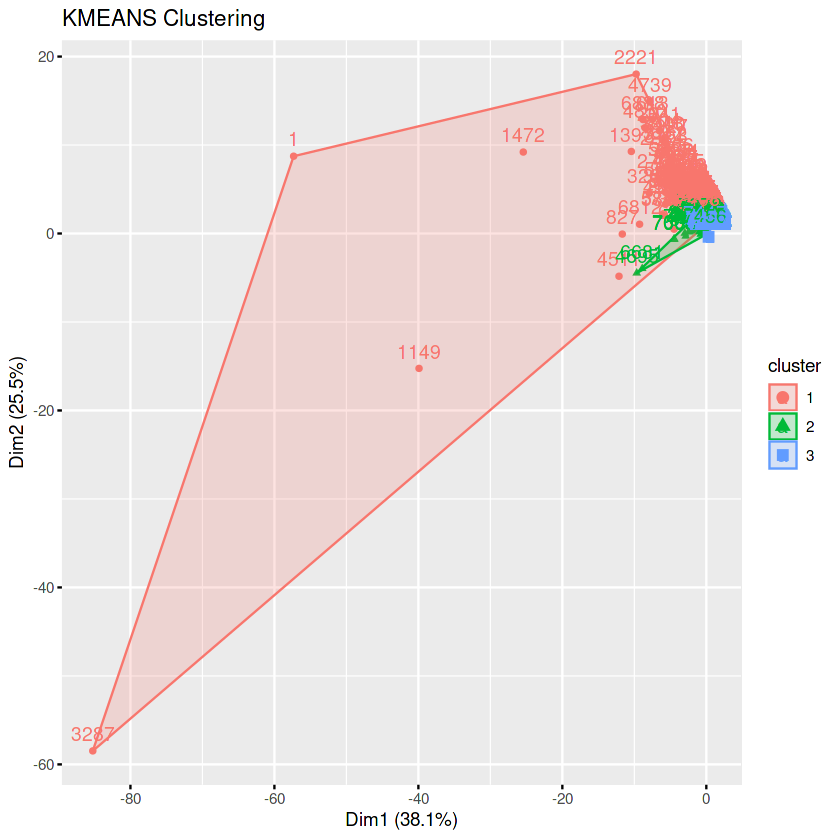

In [57]:
res.km1 <-eclust(p_df2, "kmeans", hc_metric="euclidean",k=3)

In [58]:
res.km1

K-means clustering with 3 clusters of sizes 726, 1131, 5600

Cluster means:
  community_score       stars reddit_accounts_active_48h
1       1.2184279  0.44095546                 0.28327054
2       1.5669983 -0.04577552                 0.03786476
3      -0.4744382 -0.04792170                -0.04437133
  reddit_average_comments_48h developer_score commit_count_4_weeks
1                 0.184312484       2.6487252           0.80547163
2                 0.004469878      -0.1575461          -0.08486206
3                -0.024797553      -0.3115696          -0.08728454

Clustering vector:
   [1] 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3
  [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [75] 3 3 3 2 2 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 [1

In [59]:
df2 <- select(cmd, id, asset_platform_id)
p_df1 <- left_join(p_df1, df2, by = "id")
head(p_df1)

id,community_score,stars,reddit_accounts_active_48h,reddit_average_comments_48h,developer_score,commit_count_4_weeks,asset_platform_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
bitcoin,71.280,53934,12658,2110.636,98.879,339,NA
01coin,14.962,14,5,0.000,44.415,0,NA
0-5x-long-algorand-token,0.000,0,0,0.000,0.000,0,ethereum
0-5x-long-altcoin-index-token,0.000,0,0,0.000,0.000,0,ethereum
0-5x-long-balancer-token,0.000,0,0,0.000,0.000,0,ethereum
0-5x-long-bitcoin-cash-token,0.000,0,0,0.000,0.000,0,ethereum


In [60]:
p_df1$pod_cluster <- res.km1$cluster
p_df1 %>% 
    group_by(pod_cluster) %>%
    slice_max(order_by = developer_score,n = 7)

p_df1 %>%
    filter(id == "chainlink")

id,community_score,stars,reddit_accounts_active_48h,reddit_average_comments_48h,developer_score,commit_count_4_weeks,asset_platform_id,pod_cluster
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
bitcoin,71.280,53934,12658,2110.636,98.879,339,NA,1
ethereum,62.899,30455,3961,278.167,97.173,95,NA,1
eos,48.324,11188,391,31.636,94.125,139,eos,1
status,37.677,3127,47,0.750,89.147,35,ethereum,1
lisk,43.460,2741,80,2.250,88.940,193,NA,1
monero,55.134,5855,1120,222.167,88.847,27,NA,1
stellar,50.643,2715,649,52.333,87.629,66,NA,1
nucleus-vision,43.643,0,68,0.000,36.042,0,ethereum,2
cortex,39.537,10,12,0.250,34.532,0,ethereum,2


id,community_score,stars,reddit_accounts_active_48h,reddit_average_comments_48h,developer_score,commit_count_4_weeks,asset_platform_id,pod_cluster
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
chainlink,48.091,1945,466,12.667,84.784,380,ethereum,1


In [61]:
df3 <- select(p_df1, id, pod_cluster, developer_score, community_score)
value_coins <- left_join(c_df1, df3, by = "id")
head(value_coins)

id,md_circulating_supply,md_current_price,md_ath_change_percentage,md_total_volume,coingecko_score,liquidity_score,asset_platform_id,cluster,pcluster,pod_cluster,developer_score,community_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
bitcoin,18713700,3.836200e+04,-40.80338,8.038165e+10,80.479,100.391,NA,2,1,1,98.879,71.280
01coin,10646361,2.671480e-03,-92.18446,1.226970e+04,21.938,1.000,NA,2,1,1,44.415,14.962
0-5x-long-algorand-token,0,1.484459e+04,-26.23119,9.999500e+04,0.200,1.000,ethereum,3,2,3,0.000,0.000
0-5x-long-altcoin-index-token,0,1.845475e+04,-23.93530,3.513600e+04,0.062,0.310,ethereum,3,2,3,0.000,0.000
0-5x-long-balancer-token,0,1.252018e+04,-29.56388,8.744970e+03,0.200,1.000,ethereum,3,2,3,0.000,0.000
0-5x-long-bitcoin-cash-token,0,1.526163e+04,-6.56527,3.932310e+03,0.000,0.000,ethereum,3,2,3,0.000,0.000


In [62]:
value_coins <- value_coins %>% 
    filter(cluster == 2 & pcluster == 1 & pod_cluster == 1) %>%
    arrange(desc(coingecko_score))
print(dim(value_coins))
head(value_coins)

[1] 605  13


id,md_circulating_supply,md_current_price,md_ath_change_percentage,md_total_volume,coingecko_score,liquidity_score,asset_platform_id,cluster,pcluster,pod_cluster,developer_score,community_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
bitcoin,18713700,3.83620e+04,-40.80338,80381645199,80.479,100.391,NA,2,1,1,98.879,71.280
ethereum,115980456,2.36604e+03,-45.64788,141392923000,77.576,100.635,NA,2,1,1,97.173,62.899
dogecoin,129707901212,3.42034e-01,-53.03660,6910885512,72.131,85.507,NA,2,1,1,80.486,76.885
eos,957660558,5.28000e+00,-76.74584,4683260015,67.251,83.446,eos,2,1,1,94.125,48.324
binancecoin,154533652,3.14600e+02,-54.18894,4659247041,66.874,82.233,binancecoin,2,1,1,73.242,63.951
cardano,32066390668,1.14000e+00,-53.07300,6196208407,66.017,86.139,NA,2,1,1,70.439,59.744


In [63]:
value_coins %>%
    filter(id %in% top_coins$id)

id,md_circulating_supply,md_current_price,md_ath_change_percentage,md_total_volume,coingecko_score,liquidity_score,asset_platform_id,cluster,pcluster,pod_cluster,developer_score,community_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
bitcoin,1.871370e+07,3.836200e+04,-40.80338,80381645199,80.479,100.391,NA,2,1,1,98.879,71.280
ethereum,1.159805e+08,2.366040e+03,-45.64788,141392923000,77.576,100.635,NA,2,1,1,97.173,62.899
dogecoin,1.297079e+11,3.420340e-01,-53.03660,6910885512,72.131,85.507,NA,2,1,1,80.486,76.885
binancecoin,1.545337e+08,3.146000e+02,-54.18894,4659247041,66.874,82.233,binancecoin,2,1,1,73.242,63.951
cardano,3.206639e+10,1.140000e+00,-53.07300,6196208407,66.017,86.139,NA,2,1,1,70.439,59.744
ripple,4.613537e+10,9.011180e-01,-73.49166,9566094773,64.922,87.055,NA,2,1,1,71.137,53.516
monero,1.791519e+07,2.436300e+02,-55.07632,671078996,63.943,66.653,NA,2,1,1,88.847,55.134
vechain,6.524175e+10,1.042540e-01,-62.64408,1896226504,63.058,75.082,vechain,2,1,1,79.662,52.270
matic-network,6.155590e+09,1.330000e+00,-49.22384,3994657609,59.958,82.219,ethereum,2,1,1,61.712,51.393


In [65]:
value_coins$coingecko_rank <- cmd$coingecko_rank[match(value_coins$id,cmd$id)]


In [71]:
dim(value_coins)

[1] 605  14

In [94]:
m <- c(100, 200, 300, 400, 500, 600)
for (i in m){
    rank <- value_coins %>%
    arrange(coingecko_rank) %>%
    head(i) %>%
    tail(1) %>%
    select(coingecko_rank)
    print(paste0("Top ",i," coins - ",(i/rank$coingecko_rank)*100,"%"))
}

[1] "Top 100 coins - 99.009900990099%"
[1] "Top 200 coins - 89.2857142857143%"
[1] "Top 300 coins - 78.9473684210526%"
[1] "Top 400 coins - 67.0016750418761%"
[1] "Top 500 coins - 54.585152838428%"
[1] "Top 600 coins - 35.3565114908662%"
